In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 100
X = np.random.randn(size,2)
Y = np.zeros([size,2])
Y[:,0] = np.array([0]*int(size * 0.5) + [1]*int(size * 0.5))
Y[:,1] = np.array([1]*int(size * 0.5) + [0]*int(size * 0.5))

In [3]:
X[:int(size/2),:] += 1
X[int(size/2):,:] -= 1

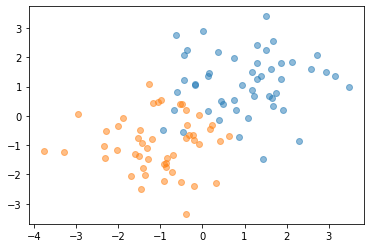

In [4]:
plt.scatter(X[:int(size/2),0],X[:int(size/2),1], alpha = 0.5)
plt.scatter(X[int(size/2):,0],X[int(size/2):,1], alpha = 0.5)
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
# from tensorflow.keras.metrics import Accuracy
# from tensorflow.keras.losses import binary_crossentropy

In [6]:
metricas = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve = 'PR')
]

### Nota:

`validation_split` separa un porcentaje de los datos, pero **ojo**, toma el % indicado del final de X e Y (ej: el último 20%). Si los datos no están originalmente mezclados, corro riesgo de validar incorrectamente mi modelo por no tomar una muestra aleatoria. Por tal motivo es importante mezclar los datos antes de alimentárselos al modelo.

`shuffle` mezcla los datos después de cada epoch. El valor por default es `True`


In [7]:
# Mezclo X e Y
indexes = np.array(range(len(X))) # Array con índices de igual largo que X
np.random.shuffle(indexes) # Mezclo el array anterior
# Redefino a X e Y de forma desordenada
X = X[indexes,:]
Y = Y[indexes,:]

In [108]:
# Instancio el modelo
model = Sequential()
# Defino arquitectura de la red
model.add(Dense(6, input_shape = (2,)))
model.add(Dense(2, activation = 'sigmoid'))
print(model.summary())
model.compile(SGD(learning_rate=0.05), loss='binary_crossentropy', metrics = metricas)
history = model.fit(X,Y, epochs=50, verbose=1, batch_size=25, validation_split=0.2, shuffle=True )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 18        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 4s 582ms/step - loss: 0.8186 - tp: 136.0000 - fp: 47.0000 - tn: 133.0000 - fn: 44.0000 - accuracy: 0.7472 - precision: 0.7432 - recall: 0.7556 - auc: 0.8431 - prc: 0.8522 - val_loss: 0.8368 - val_tp: 11.0000 - val_fp: 12.0000 - val_tn: 8.0000 - val_fn: 9.0000 - val_accuracy: 0.4750 - val_precision: 0.4783 - val_recall: 0.5500 - val_auc: 0.4887 - val_prc: 0.5051
Epoch 2/50
4/4 [===================

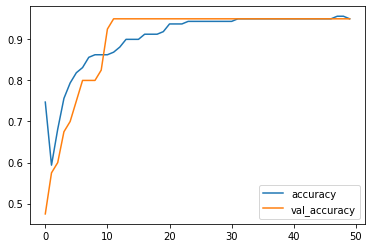

In [109]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.show()

In [110]:
model.evaluate(X,Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.1807 - tp: 95.0000 - fp: 5.0000 - tn: 95.0000 - fn: 5.0000 - accuracy: 0.9500 - precision: 0.9500 - recall: 0.9500 - auc: 0.9826 - prc: 0.9830


[0.1806759387254715,
 95.0,
 5.0,
 95.0,
 5.0,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.9825500249862671,
 0.9829774498939514]

In [111]:
# Parámetros aprendidos por el modelo
w = model.get_weights()
print(w)

[array([[ 0.50791174, -0.4102477 ,  0.23174843,  0.39901417, -1.1664922 ,
         0.7007147 ],
       [ 0.3534786 , -0.41806537, -0.03929282,  0.78432286, -0.77350694,
        -0.30191326]], dtype=float32), array([ 0.00672131,  0.01293345, -0.00795498, -0.01435903,  0.02524194,
       -0.01721825], dtype=float32), array([[ 0.08306647,  0.26065594],
       [ 0.796517  , -0.19710822],
       [ 0.11367827,  0.47403327],
       [-0.9838576 ,  0.36128685],
       [ 0.7640865 , -1.2517158 ],
       [-0.61528224,  0.05844117]], dtype=float32), array([ 0.01941411, -0.01946114], dtype=float32)]


La cantidad de filas corresponde a las entradas y las columnas a las salidas. En este ejemplo:
- El primer array corresponde a los parámetros de entrada:
    - Input 1 conecta con 6 elementos de la primer capa,
    - Input 2 conecta con 6 elementos de la primer capa. 
- El segundo array corresponde a los parámetros del bias (1 por cada uno de los 6 elementos de la primer capa),
- El tercer array corresponde a los parámetros de la 2da capa. Cada fila contiene los parámetros que vinculan el elemento de la primer capa, con cada elemento de la segunda. Por tal motivo son 6 filas (entradas) y 2 columnas (salidas)

In [112]:
a = np.array([[1,1]])

In [113]:
model.predict(a)

array([[0.0327709 , 0.96430385]], dtype=float32)

In [114]:
l1 = a @ w[0] + w[1]

In [115]:
l1

array([[ 0.86811167, -0.81537963,  0.18450063,  1.168978  , -1.91475722,
         0.3815832 ]])

In [116]:
output = l1 @ w[2] + w[3]

In [117]:
output

array([[-3.38489429,  3.29636316]])

In [118]:
output_activation = 1/(1+np.exp(-output))

In [119]:
output_activation

array([[0.03277091, 0.96430383]])